Import statements for Bayes Implementation

In [104]:
import numpy as np 
import pandas as pd 
import sklearn.naive_bayes as nb
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt

Read in descreet cleaned data with categorical target class:

In [105]:
df = pd.read_csv("cleaned_data_discreet.csv")
df.drop(["Unnamed: 0"], axis = 1,inplace = True)
columns = df.columns
df.head()

,Number of Bachelor's Degrees,Percent Financial Aid,Average Amount of Aid,Retention Rate,Enrollment,Percent Women,Percent In State,Percent Out of State,Percent Foreign,Percent Unknown,Graduation Rate,Percent Awarded,Total Staff,Instructional Staff,SA Staff,Librarian Staff,Percent Books,Percent Digital,Percent Admitted,Total Price
0,208.0,100.0,32400.0,79.0,996,99.0,59.0,36.0,4.0,0.0,69.0,66.0,357.0,105.0,56.0,62.0,41,12,70.0,"50,000-60,000"
1,310.0,100.0,40855.0,75.0,1533,54.0,66.0,32.0,1.0,0.0,64.0,61.0,435.0,132.0,21.0,27.0,37,54,68.0,"50,000-60,000"
2,398.0,100.0,39796.0,68.0,1912,60.0,53.0,46.0,1.0,0.0,51.0,48.0,355.0,123.0,17.0,21.0,28,13,62.0,"60,000-70,000"
3,382.0,100.0,38689.0,82.0,1771,56.0,50.0,45.0,4.0,0.0,74.0,70.0,426.0,160.0,41.0,50.0,27,46,64.0,"60,000-70,000"
4,61.0,97.0,10055.0,37.0,698,45.0,64.0,34.0,0.0,2.0,31.0,10.0,115.0,41.0,4.0,7.0,20,76,64.0,"20,000-30,000"


Set x to the most important features as found through RF feature selection.

In [106]:
x = df[["Average Amount of Aid", "Percent Financial Aid", 
        "Percent Awarded", "Total Staff", "Graduation Rate", 
       "Percent Admitted", "Number of Bachelor's Degrees"]]
#x = df[columns[0:-1]]
y = df['Total Price']

Implement each type of Bayes model.

In [107]:
gaussianModel = nb.GaussianNB()
bernoulliModel = nb.BernoulliNB()
multinomialModel = nb.MultinomialNB()
complementModel = nb.ComplementNB()

Split training and testing data:

In [108]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

Fit each type of model with trained x and y:

In [109]:
gaussianModel.fit(X_train, y_train)
bernoulliModel.fit(X_train, y_train)
multinomialModel.fit(X_train, y_train)
complementModel.fit(X_train, y_train)

ComplementNB()

Obtain the y prediction for each model:

In [110]:
predGTest = gaussianModel.predict(X_test)
predGTrain = gaussianModel.predict(X_train)
predB = bernoulliModel.predict(X_test)
predM = multinomialModel.predict(X_test)
predC = complementModel.predict(X_test)

Calculate accuracies for each model:

In [111]:
accuracies = [accuracy_score(y_test, predG),
              accuracy_score(y_test, predB),
              accuracy_score(y_test, predB),
              accuracy_score(y_test, predC)]

models = ["Gaussian",
          "Bernoulli",
          "Multinominal",
          "Complement"]


Based on the accuracy scores above, plot each model and their coordinating accuracies to find which model performs best:

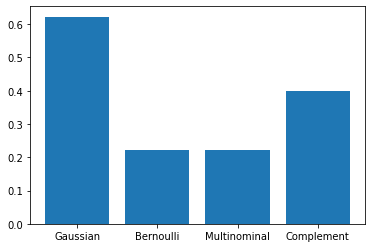

In [112]:
#fig, axs = plt.subplot(ncols=1, nrows=1)
fig, ax = plt.subplots()
plt.bar(models, accuracies)
plt.show()

In [113]:
print("Gaussian Accuracy: " + str(accuracies[0]))
print("Gaussian Train Accuracy: " + str(accuracy_score(y_train, predGTrain)))

Gaussian Accuracy: 0.6222222222222222
Gaussian Train Accuracy: 0.65


A Gaussian implementation for Naive Bayes produces the best accuracy; however, due to the given features the accuracy is not great. 